# 读取score并画图

In [69]:
cup_score = []
bottle_score = []
spoon_score = []
for line in open("runs/cup_score.txt"):
    line=line.strip('\n')
    cup_score.append(float(line))
for line in open("runs/bottle_score.txt"):
    line=line.strip('\n')
    bottle_score.append(float(line))
for line in open("runs/spoon_score.txt"):
    line=line.strip('\n')
    spoon_score.append(float(line))

In [70]:
len(cup_score), len(bottle_score), len(spoon_score)

(412, 412, 412)

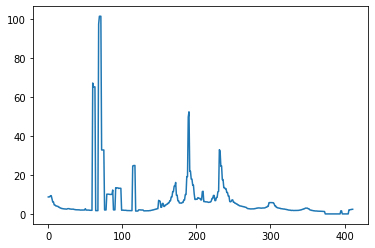

In [71]:
import matplotlib.pyplot as plt
import numpy as np


x = np.arange(0, len(cup_score))
y = np.array(cup_score)

plt.plot(x, y)
plt.show()

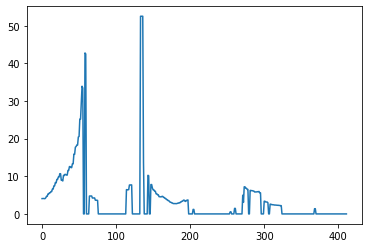

In [72]:
x = np.arange(0, len(bottle_score))
y = np.array(bottle_score)

plt.plot(x, y)
plt.show()

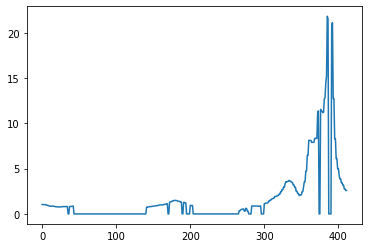

In [73]:
x = np.arange(0, len(spoon_score))
y = np.array(spoon_score)

plt.plot(x, y)
plt.show()

# 记录score

In [64]:
import numpy as np
class_score_log = np.zeros((8, 1))
new_frame = np.ones(8)
class_score_log = np.column_stack((class_score_log,new_frame))
class_score_log

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [66]:
import numpy as np
class_score_log = np.zeros((8, 1))
new_frame = np.zeros(8)
frame_idx = 0
for i in range(5):
    if frame_idx >= 1:
        class_score_log = np.column_stack((class_score_log,new_frame))
    class_score_log[2,:][frame_idx] = 99
    frame_idx += 1
class_score_log

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [99., 99., 99., 99., 99.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

# 将score转化为概率

In [1]:
import torch
import torch.nn as nn

score_list = [1, 0.7, 6, 0.3, 5]
softmax = nn.Softmax(dim=0)  # 使用softmax表示概率
prob_list1 = softmax(torch.tensor(score_list))
print(prob_list1)
prob1 = prob_list1.max().item()
prob1 = round(prob1, 4)

sigmoid = nn.Sigmoid()  # 使用sigmoid表示概率（并没有归一）
prob_list2 = sigmoid(torch.tensor(score_list))
print(prob_list2)

def norm_prob(score_list):
    prob_list = []
    for i in range(len(score_list)):
        prob_list.append(round(score_list[i] / (sum(score_list)), 4))
    return max(prob_list)
prob3 = norm_prob(score_list)
print(prob1, prob3)

tensor([0.0049, 0.0036, 0.7231, 0.0024, 0.2660])
tensor([0.7311, 0.6682, 0.9975, 0.5744, 0.9933])
0.7231 0.4615


# 计算Accuracy

In [3]:
result = []
for line in open("runs/result.txt"):
    line=line.strip('\n')
    result.append(int(line))
count = 0
for i in range(len(result)):
    if result[i] == 1:
        count += 1
print("Accuracy = ", count/len(result))


Accuracy =  0.9101123595505618


# 画图

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import palettable  #python颜色库

eval_seq = []
for line in open("runs/eval_seq/exp/eval_seq.txt"):
    line=line.strip('\n')
    eval_seq.append(float(line))
eval_seq = np.array(eval_seq).reshape(-1, 1)

eval_seq2 = []
for line in open("runs/eval_seq/exp2/eval_seq.txt"):
    line=line.strip('\n')
    eval_seq2.append(float(line))
eval_seq2 = np.array(eval_seq2).reshape(-1, 1)

In [40]:
# seq_matrix = np.matrix(eval_seq)
# print(seq_matrix.shape)
# seq_matrix = np.column_stack((seq_matrix,eval_seq2))
# print(seq_matrix.shape)

Text(0.5, 1.0, 'Sequence Evaluation')

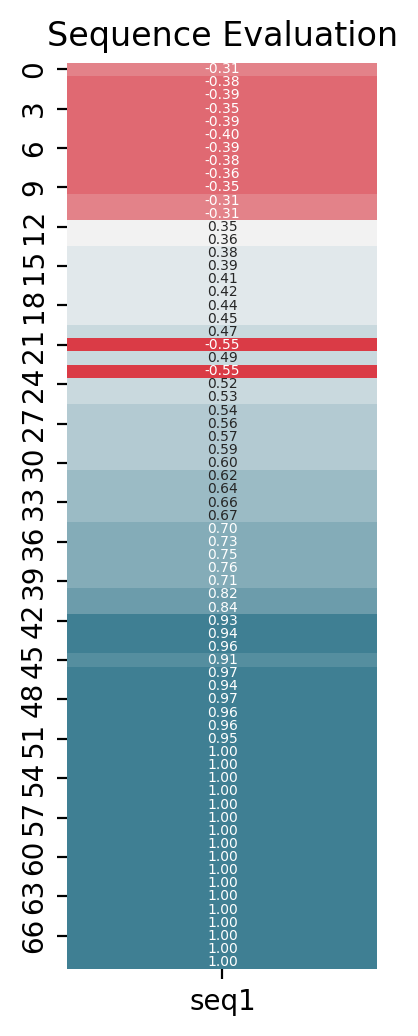

In [42]:
df = pd.DataFrame(eval_seq,
                  # index=[str(i) for i in range(0, 60)],#DataFrame的行标签设置为大写字母
                  columns=["seq1"])#设置DataFrame的列标签
plt.figure(dpi=200, figsize=(2,6))
sns.heatmap(data=df,
            cmap=sns.diverging_palette(10, 220, sep=50, n=20),#区分度显著色盘：sns.diverging_palette()使用
            annot=True, fmt=".2f", annot_kws={'size':5,'weight':'normal'},
            cbar=False,
           )
plt.title("Sequence Evaluation")

# Vote函数

In [1]:
import numpy as np

class_score_log = np.arange(24).reshape(4,6)
print(class_score_log)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


In [5]:
frame_log = [{"cls_num": 2, "score": 5, "coffset": 1}, {"cls_num": 1, "score": 3, "coffset": 4},
             {"cls_num": 2, "score": 8, "coffset": 3}]
step = 3
class_score_seq = np.zeros((len(frame_log), step))
# class_score_seq用来记录当前帧的排布，后续会联系上下文累积成sequence，但是索引保持与frame_log一致
for i in range(len(frame_log)):
    idx = frame_log[i]["cls_num"]
    class_score_seq[i] = class_score_log[idx, -step:]
score_sum = class_score_seq.sum(axis=1)
print(score_sum)
target_idx = np.argwhere(score_sum == score_sum.max())
print(target_idx)
target_idx = np.array(target_idx).reshape(-1).tolist()
print(target_idx)
coffset = []
for i in target_idx:
    coffset.append(frame_log[i]["coffset"])
idx = coffset.index(min(coffset))
target_idx = target_idx[idx]
target_idx

[48. 30. 48.]
[[0]
 [2]]
[0, 2]


0

In [3]:
step = 4
class_score_seq = class_score_log[:, -step:]
score_sum = class_score_seq.sum(axis=1)
score_sum

array([14, 38, 62, 86])

In [4]:
score_sum.argmax()

3